In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Zomato-data.csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [9]:
def handleRate(val):
    data = str(val).split('/')
    return float(data[0])

In [11]:
df['rate'] = df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [12]:
# summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [14]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

<Axes: xlabel='listed_in(type)', ylabel='count'>

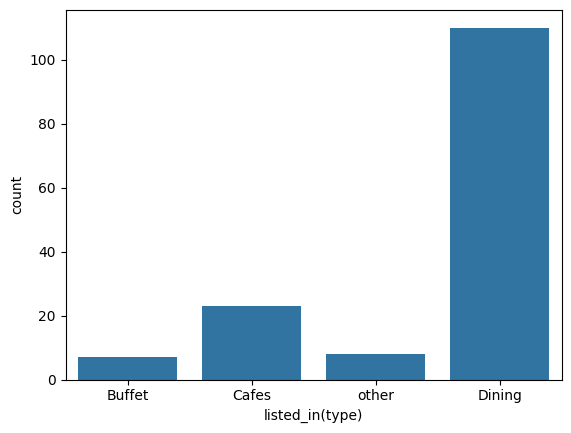

In [18]:
# Resturants Types
sns.countplot(x=df['listed_in(type)'])
# plt.xlabel("Type of restaurant")             

In [22]:
# votes for resturant types
group_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':group_data})
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Votes')

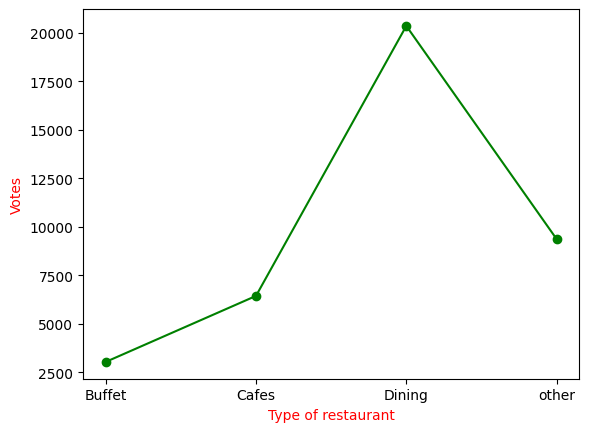

In [24]:
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='red', size=10)
plt.ylabel('Votes', c='red', size=10)

In [31]:
# Identify most voted resturants
df.head()
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


Text(0, 0.5, 'Count')

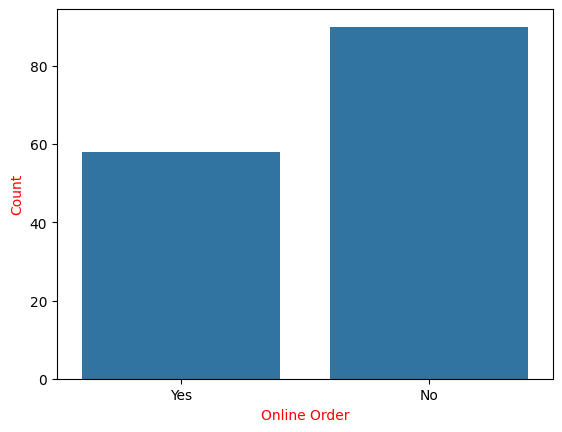

In [35]:
# Online Order Availability
sns.countplot(x=df['online_order'])
plt.xlabel('Online Order', c='red', size=10)
plt.ylabel('Count', c='red', size=10)

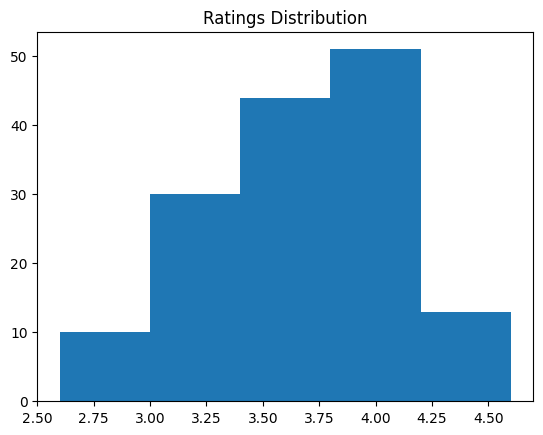

In [36]:
# Analyze Ratings
plt.hist(df['rate'], bins=5)
plt.title('Ratings Distribution')
plt.show()

Text(0, 0.5, 'Count')

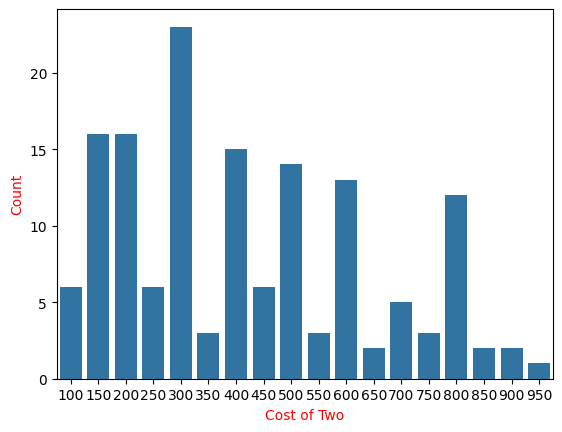

In [39]:
# Approximate Cost for Couples
sns.countplot(x= df['approx_cost(for two people)'])
plt.xlabel('Cost of Two', c='red', size=10)
plt.ylabel('Count', c='red', size=10)

In [40]:
# Ratings Comparison - Online vs Offline Orders
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

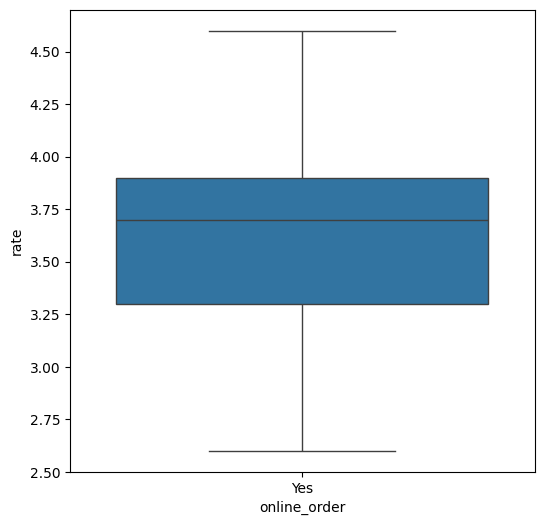

In [56]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)


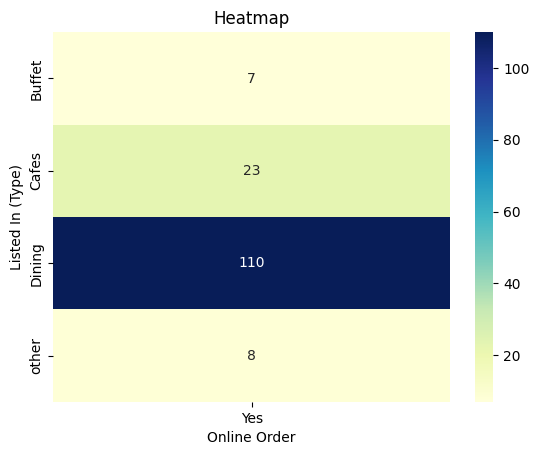

In [57]:
# Order Mode Preferences by Restaurant Type
# find the relationship b/w online order and resturant type

pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()